# **Acquire and Prep - Wrangle**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import acquire
from acquire import acquire_zillow

import warnings
warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

import seaborn as sns



In [2]:
# acquire the data
df = acquire.acquire_zillow()


In [8]:
#Sample and Summarize

df.head(3)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None


# **Q1)** 
- Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [4]:
df1 = df[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']]
          
          

In [20]:
df1.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,11013.72,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,5672.48,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6488.30,6059.0


# **Q2**
- Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [9]:
# 77380 rows and 7 columns coming in.
df1.shape

(77380, 7)

In [10]:
# Display readable summary statistics for numeric columns. Why isn't exam3 showing up?

df1.describe().T


,count,mean,std,min,25%,50%,75%,max
bedroomcnt,77380.0,3.053489,1.139103,0.00,2.000,3.00,4.0,16.0
bathroomcnt,77380.0,2.299134,0.996657,0.00,2.000,2.00,3.0,18.0
calculatedfinishedsquarefeet,77184.0,1785.229465,954.051796,128.00,1182.000,1543.00,2113.0,35640.0
taxvaluedollarcnt,77379.0,490137.462606,653447.667471,1000.00,207000.000,358976.00,569003.0,49061236.0
yearbuilt,77117.0,1968.635943,23.786166,1824.00,1953.000,1970.00,1987.0,2016.0
taxamount,77375.0,5995.566592,7622.887460,19.92,2715.585,4450.72,6927.8,586639.3
fips,77380.0,6048.819385,20.748290,6037.00,6037.000,6037.00,6059.0,6111.0


In [12]:
# Running .info() shows us that the exam3 column is not a numeric data type; it's an object.

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    77380 non-null  float64
 1   bathroomcnt                   77380 non-null  float64
 2   calculatedfinishedsquarefeet  77184 non-null  float64
 3   taxvaluedollarcnt             77379 non-null  float64
 4   yearbuilt                     77117 non-null  float64
 5   taxamount                     77375 non-null  float64
 6   fips                          77380 non-null  float64
dtypes: float64(7)
memory usage: 4.1 MB


In [24]:
# Check for any Null values in each column of our DataFrame.

df1.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [28]:
# Return the names for any columns in our DataFrame with any Null values.

df1.columns[df1.isnull().any()]

Index(['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount'],
      dtype='object')

In [30]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df1 = df1.replace(r'^\s*$', np.nan, regex=True)

In [31]:
# Drop all rows with any Null values, assign to df, and verify.

df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77101 entries, 0 to 77379
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    77101 non-null  float64
 1   bathroomcnt                   77101 non-null  float64
 2   calculatedfinishedsquarefeet  77101 non-null  float64
 3   taxvaluedollarcnt             77101 non-null  float64
 4   yearbuilt                     77101 non-null  float64
 5   taxamount                     77101 non-null  float64
 6   fips                          77101 non-null  float64
dtypes: float64(7)
memory usage: 4.7 MB


**Acquire and Summarize Takeaways**

- All data has Dtype Float64 change to int64.

In [32]:
# Change all column data tyes to int64, reassign to df, and verify.

df1 = df1.astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77101 entries, 0 to 77379
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   bedroomcnt                    77101 non-null  int64
 1   bathroomcnt                   77101 non-null  int64
 2   calculatedfinishedsquarefeet  77101 non-null  int64
 3   taxvaluedollarcnt             77101 non-null  int64
 4   yearbuilt                     77101 non-null  int64
 5   taxamount                     77101 non-null  int64
 6   fips                          77101 non-null  int64
dtypes: int64(7)
memory usage: 4.7 MB


In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,77101.0,3.061141,1.128730,0.0,2.0,3.0,4.0,16.0
bathroomcnt,77101.0,2.239945,0.979061,0.0,2.0,2.0,3.0,18.0
calculatedfinishedsquarefeet,77101.0,1784.585168,953.207575,128.0,1182.0,1542.0,2111.0,35640.0
taxvaluedollarcnt,77101.0,488898.702818,649884.011677,1000.0,207079.0,358975.0,568715.0,49061236.0
yearbuilt,77101.0,1968.636529,23.786131,1824.0,1953.0,1970.0,1987.0,2016.0
taxamount,77101.0,5980.734932,7577.808633,19.0,2717.0,4450.0,6924.0,586639.0
fips,77101.0,6048.780288,20.714275,6037.0,6037.0,6037.0,6059.0,6111.0


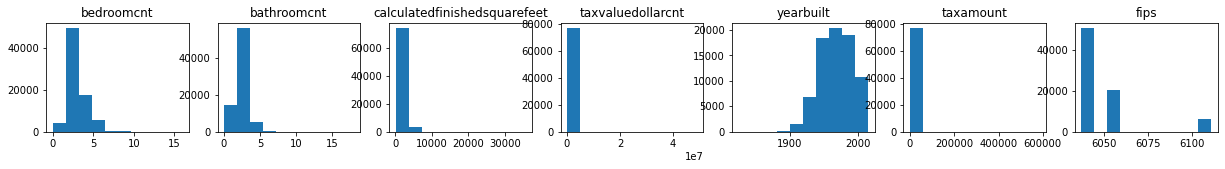

In [59]:
plt.figure(figsize=(21, 2))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt','yearbuilt','taxamount','fips']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df1[col].hist(bins=10)

    # Hide gridlines.
    plt.grid(False)

**Distribution Takeaways**

- All of the column distributions but yearbuilt

# **Pipeline Function**

We finalize these data wrangling steps (acquire and prepare) by writing a function that will reproduce the DataFrame with the necessary changes.

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from acquire import acquire_zillow

###################### Prep Zillow Data ######################

def wrangle_zillow(df):
     '''
    SQL Zillow data base information into a pandas DataFrame,
    created df1 file with only columns requested, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned data to DataFrame.
    '''
    # Acquire data from csv file.
    df = acquire.acquire_zillow()

    # show only data from the selected columns
    df1 = df[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']]
     
    # Display readable summary statistics for numeric columns.
    df1.describe().T

    # Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df1.
    df1 = df1.replace(r'^\s*$', np.nan, regex=True)

    # Drop all rows with any Null values, assign to df1, and verify.
    df1 = df1.dropna()

    # Change all column data tyes to int64, reassign to df1, and verify.
    df1 = df1.astype('int')

    df1.describe().T

    return df1


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [75]:
# Let's test out or wrangle function from above.

df1 = wrangle_grades()
df1.info()

NameError: name 'wrangle_grades' is not defined